In [1]:
import pandas as pd
import altair as alt

alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [2]:
position = 'RB'
week = '1'
PATH = 'data/week' + week + '/' + position + '/'

In [3]:
df = pd.read_csv(PATH + 'RB.csv')
df.head()

,Player,Team,Games,Attempts,RushingYards,RushingTD,Targets,Receptions,ReceivingYards,ReceivingTD,FantasyPoints,FantasyPointsPerGame
0,Christian McCaffrey,CAR,1,19,128,2,11,10,81,0,37.9,37.9
1,Austin Ekeler,LAC,1,12,58,1,7,6,96,2,36.4,36.4
2,Derrick Henry,TEN,1,19,84,1,2,1,75,1,28.4,28.4
3,Dalvin Cook,MIN,1,21,111,2,2,2,9,0,25.0,25.0
4,Josh Jacobs,OAK,1,23,85,2,1,1,28,0,23.8,23.8


In [36]:
data = df[['Player', 'Team', 'Attempts', 'RushingYards', 'Receptions', 'ReceivingYards', 'FantasyPoints']].copy()

In [10]:
# Create sorted list of teams in dataframe
# Data is defined below, above charts
teams = sorted((data['Team'].unique()))
teams[:5]

['ARI', 'ATL', 'BAL', 'BUF', 'CAR']

In [11]:
# Create list of all 32 teams
all_teams = ['ARI', 'ATL', 'BAL', 'BUF',
             'CAR', 'CHI', 'CIN', 'CLE',
             'DAL', 'DEN', 'DET', 'GB',
             'HOU', 'IND', 'JAC', 'KC', 
             'LAC', 'LAR', 'MIA', 'MIN', 
             'NE', 'NO', 'NYG', 'NYJ', 
             'OAK', 'PHI', 'PIT', 'SEA',
             'SF', 'TB', 'TEN', 'WAS']

In [12]:
# Sometimes a team can be missing, find which ones
[team for team in all_teams if team not in teams]

['GB', 'MIA']

In [13]:
# Create list of team colors, comment colors for missing teams
color_codes = [
    '#97233F', #ARI
    '#A71930', #ATL
    '#241773', #BAL
    '#00338D', #BUF
    '#0085CA', #CAR
    '#C83803', #CHI
    '#FB4F14', #CIN
    '#311D00', #CLE
    '#869397', #DAL
    '#FB4F14', #DEN
    '#0076B6', #DET
    # '#203731', #GB
    '#03202F', #HOU
    '#002C5F', #IND
    '#006778', #JAC
    '#E31837', #KC
    '#FFC20E', #LAC
    '#866D4B', #LAR
    # '#FC4C02', #MIA
    '#4F2683', #MIN
    '#002244', #NE
    '#D3BC8D', #NO
    '#0B2265', #NYG
    '#125740', #NYJ
    '#000000', #OAK
    '#004C54', #PHI
    '#FFB612', #PIT
    '#69BE28', #SEA
    '#AA0000', #SF
    '#D50A0A', #TB
    '#418FDE', #TEN
    '#773141' #WAS
]

## Rushing Attempts

In [6]:
data = df[['Player', 'Team', 'Attempts']]

In [15]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Attempts:Q',
        axis = alt.Axis(title = 'Rushing Attempts')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'Attempts',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Rushing Attempts by Running Backs')

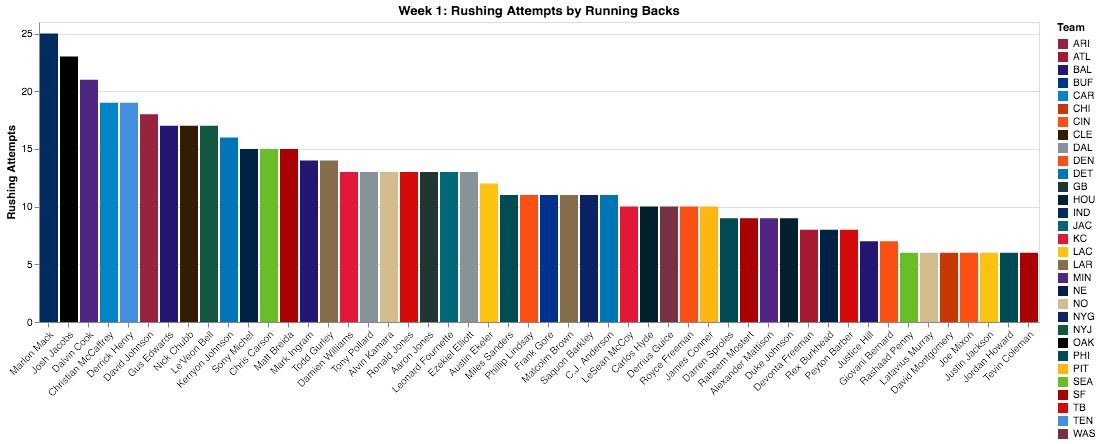

In [16]:
chart

In [17]:
chart.save(PATH + 'plots/RB_attempts_color.png', scale_factor=3.0)

In [18]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Attempts:Q',
        axis = alt.Axis(title = 'Rushing Attempts')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'Attempts',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Rushing Attempts by Running Backs')

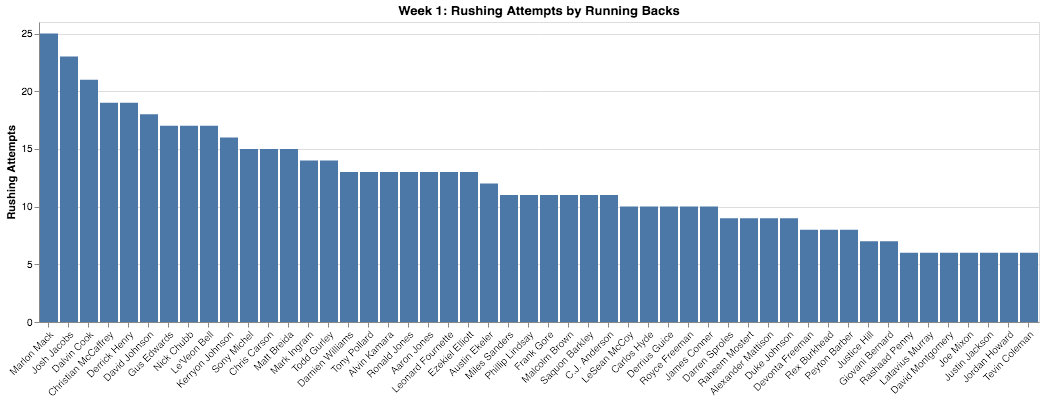

In [19]:
chart

In [20]:
chart.save(PATH + 'plots/RB_attempts_normal.png', scale_factor=3.0)

## Fantasy Points

In [34]:
data = df[['Player', 'Team', 'FantasyPoints']]

In [37]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FantasyPoints:Q',
        axis = alt.Axis(title = 'Fantasy Points')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FantasyPoints',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: 0.5 PPR Fantasy Points by Running Backs')

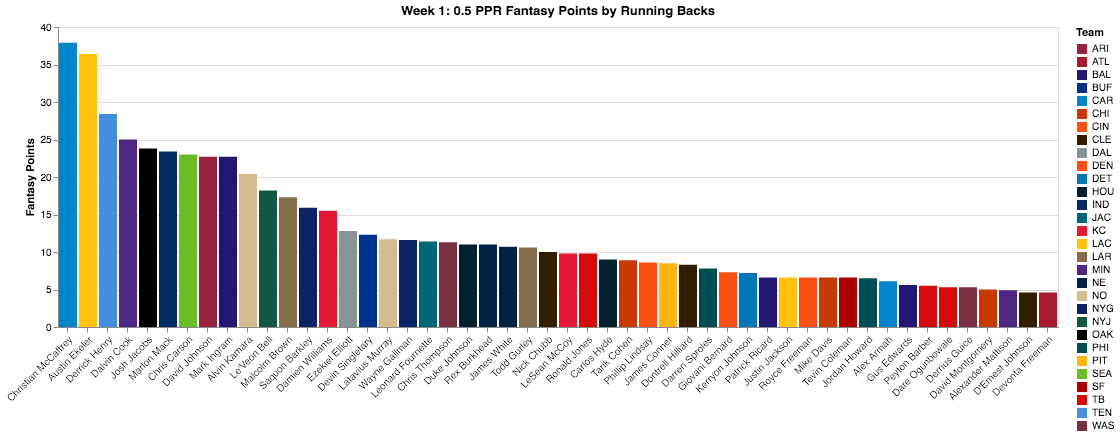

In [38]:
chart

In [39]:
chart.save(PATH + 'plots/RB_points_color.png', scale_factor=3.0)

In [40]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FantasyPoints:Q',
        axis = alt.Axis(title = 'Fantasy Points')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FantasyPoints',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: 0.5 PPR Fantasy Points by Running Backs')

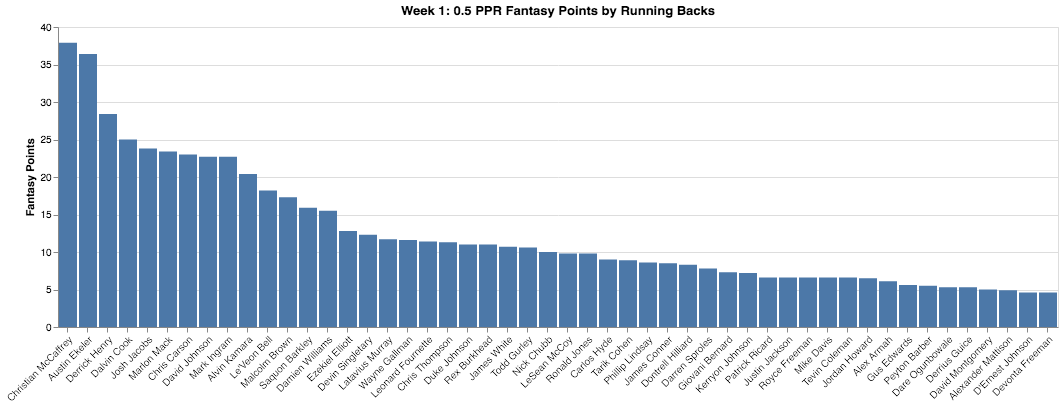

In [41]:
chart

In [42]:
chart.save(PATH + 'plots/RB_points_plain.png', scale_factor=3.0)

## Rushing Yards

In [7]:
data = df[['Player', 'Team', 'RushingYards']]
data = data.loc[data['RushingYards'] >= 20]

In [15]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'RushingYards:Q',
        axis = alt.Axis(title = 'Rushing Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'RushingYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Rushing Yards by Running Backs (Minimum 20 yards)')

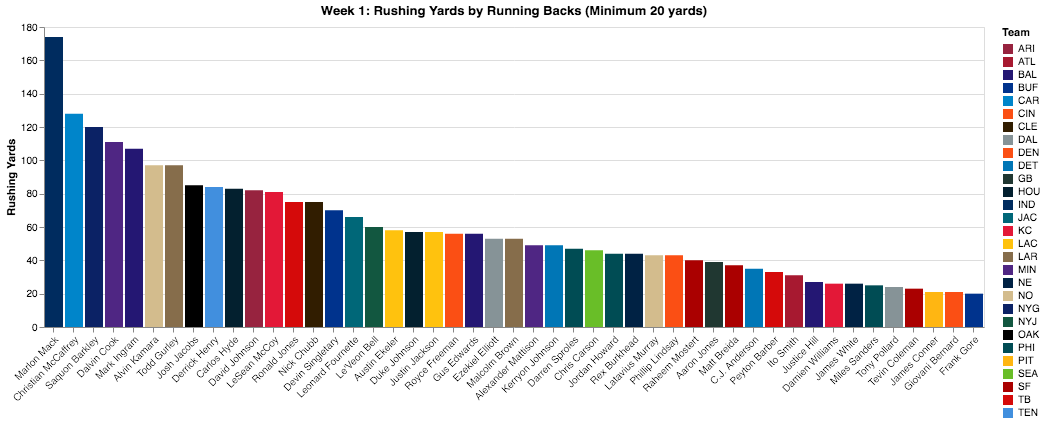

In [16]:
chart

In [17]:
chart.save(PATH + 'plots/RB_rushingyards_color.png', scale_factor=3.0)

In [18]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'RushingYards:Q',
        axis = alt.Axis(title = 'Rushing Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'RushingYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Rushing Yards by Running Backs (Minimum 20 yards)')

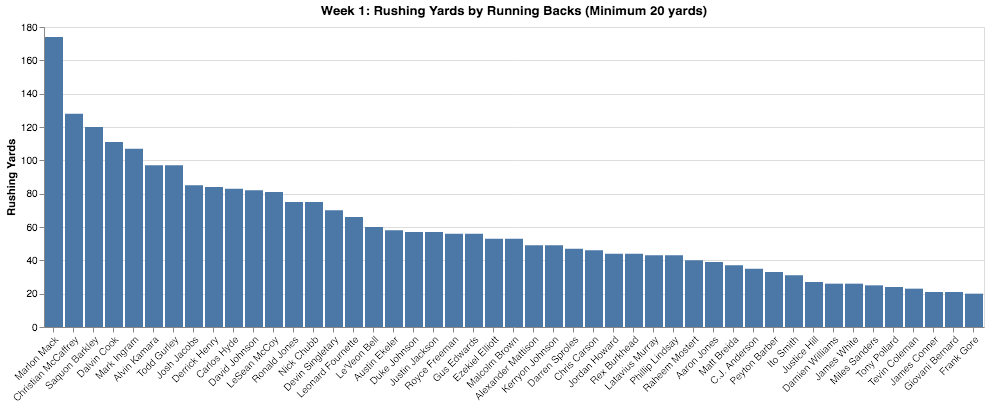

In [19]:
chart

In [20]:
chart.save(PATH + 'plots/RB_rushingyards_plain.png', scale_factor=3.0)

## Receiving Yards

In [ ]:
data = df[['Player', 'Team', 'ReceivingYards']]

In [30]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'ReceivingYards:Q',
        axis = alt.Axis(title = 'Receiving Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'ReceivingYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Receiving Yards by Running Backs')

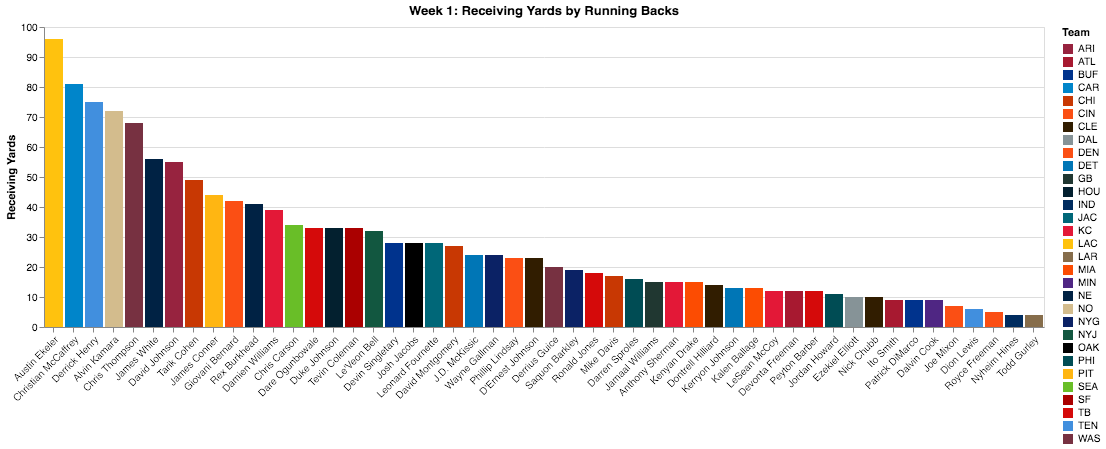

In [31]:
chart

In [32]:
chart.save(PATH + 'plots/RB_receivingyards_color.png', scale_factor=3.0)

In [33]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'ReceivingYards:Q',
        axis = alt.Axis(title = 'Receiving Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'ReceivingYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Receiving Yards by Running Backs')

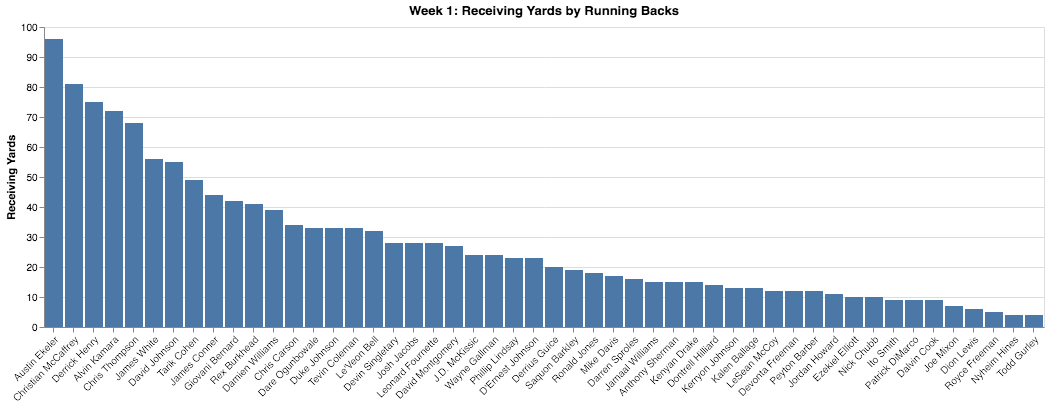

In [34]:
chart

In [35]:
chart.save(PATH + 'plots/RB_receivingyards_plain.png', scale_factor=3.0)

## Targets

In [38]:
data = df[['Player', 'Team', 'Targets']]
data = data.loc[data.Targets > 1]

In [49]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Targets:Q',
        axis = alt.Axis(title = 'Targets')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'Targets',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Targets for Running Backs (Minimum 2 Targets)')

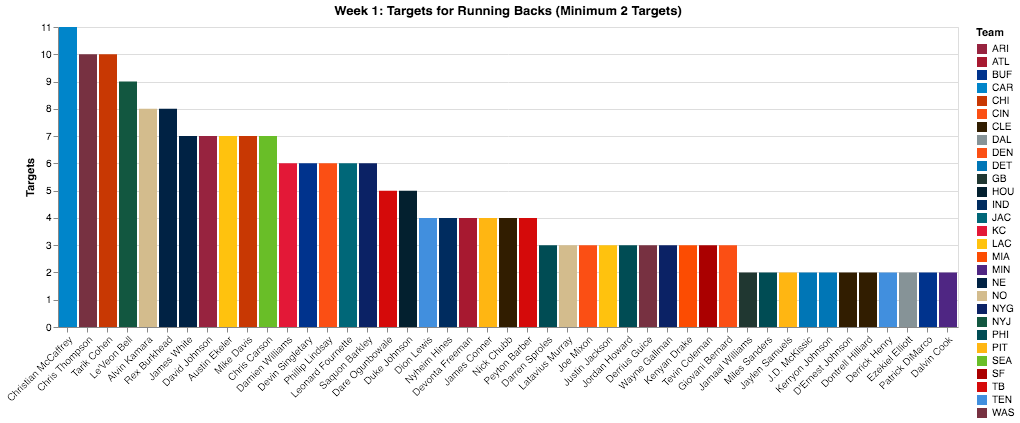

In [50]:
chart

In [51]:
chart.save(PATH + 'plots/RB_targets_color.png', scale_factor=3.0)

In [52]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Targets:Q',
        axis = alt.Axis(title = 'Targets')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'Targets',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Targets for Running Backs (Minimum 2 Targets)')

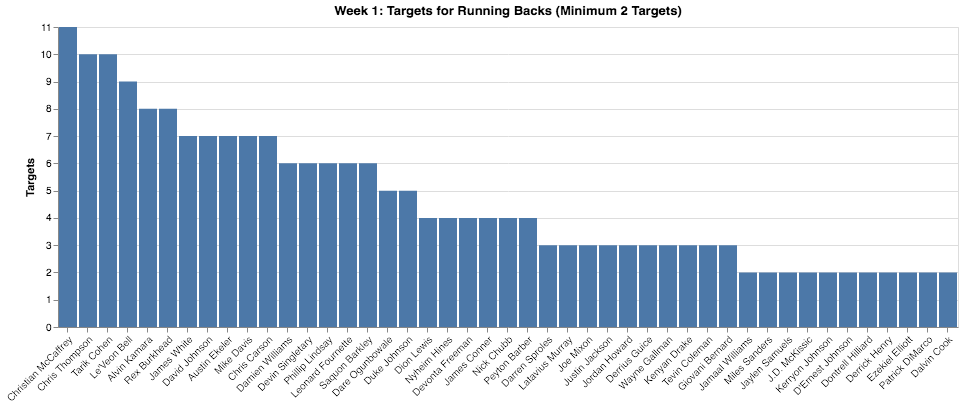

In [53]:
chart

In [54]:
chart.save(PATH + 'plots/RB_targets_plain.png', scale_factor=3.0)

## Receptions

In [61]:
data = df[['Player', 'Team', 'Receptions']]
data = data.loc[data.Receptions > 1]

In [63]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Receptions:Q',
        axis = alt.Axis(title = 'Receptions')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'Receptions',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Receptions for Running Backs (Minimum 2 Receptions)')

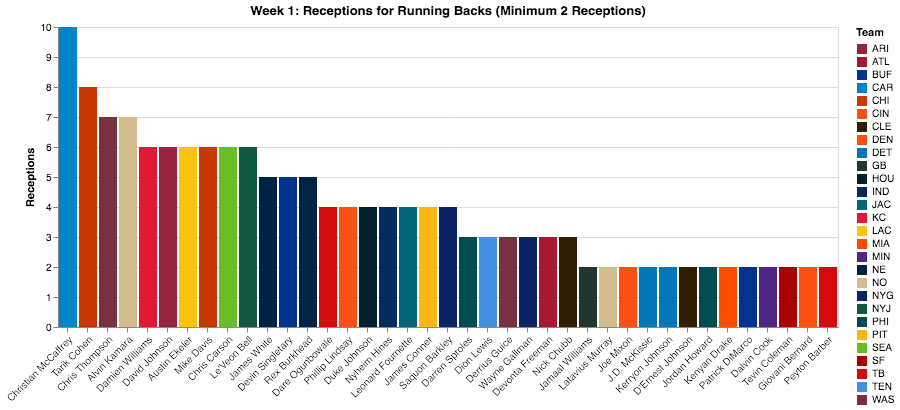

In [64]:
chart

In [65]:
chart.save(PATH + 'plots/RB_receptions_color.png', scale_factor=3.0)

In [66]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Receptions:Q',
        axis = alt.Axis(title = 'Receptions')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'Receptions',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Receptions for Running Backs (Minimum 2 Receptions)')

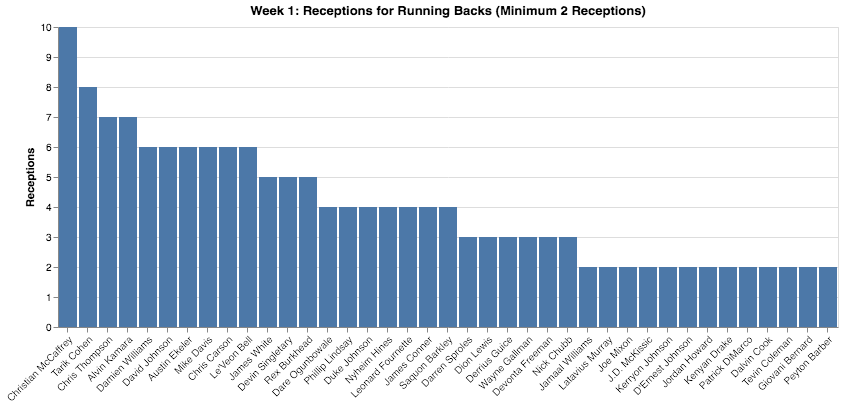

In [67]:
chart

In [68]:
chart.save(PATH + 'plots/RB_receptions_plain.png', scale_factor=3.0)

## Total Yards

In [37]:
data = df[['Player', 'Team', 'Attempts', 'RushingYards', 'Receptions', 'ReceivingYards', 'FantasyPoints']].copy()
data['TotalYards'] = data['RushingYards'] + data['ReceivingYards']

In [38]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'TotalYards:Q',
        axis = alt.Axis(title = 'Total Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'TotalYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Total Yards for Running Backs (Top 50 in 0.5PPR)')

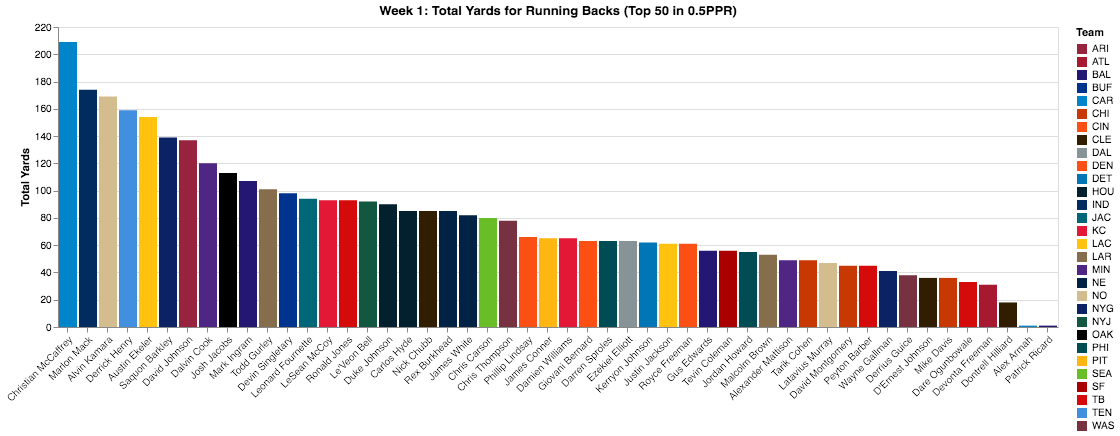

In [39]:
chart

In [40]:
chart.save(PATH + 'plots/RB_totalyards_color.png', scale_factor=3.0)

In [41]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'TotalYards:Q',
        axis = alt.Axis(title = 'Total Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'TotalYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'ReceivingYards:Q'
    )
).properties(title = 'Week 1: Total Yards for Running Backs (Top 50 in 0.5PPR)')

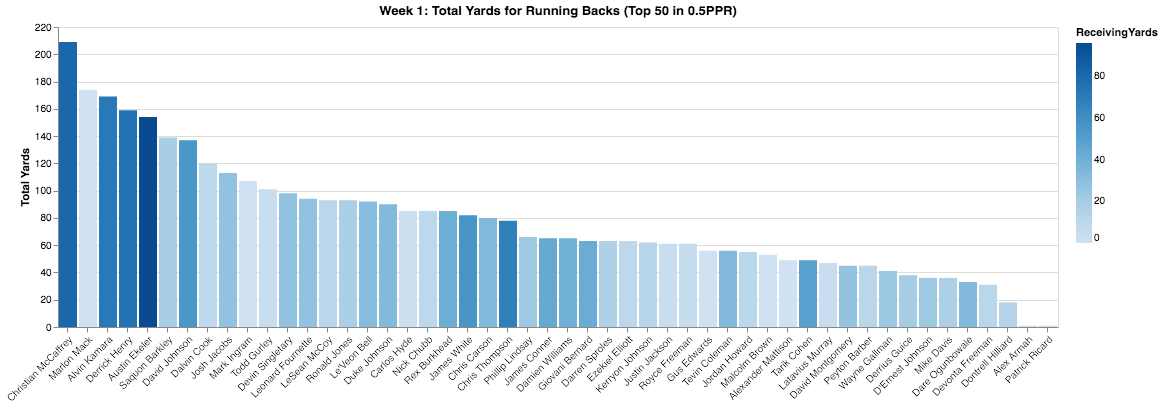

In [42]:
chart

In [43]:
chart.save(PATH + 'plots/RB_totalyards_plain.png', scale_factor=3.0)

## Touches

In [44]:
data = df[['Player', 'Team', 'Attempts', 'RushingYards', 'Receptions', 'ReceivingYards', 'FantasyPoints']].copy()
data['Touches'] = data['Attempts'] + data['Receptions']

In [45]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Touches:Q',
        axis = alt.Axis(title = 'Total Touches')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'Touches',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Total Touches for Running Backs (Top 50 in 0.5PPR)')

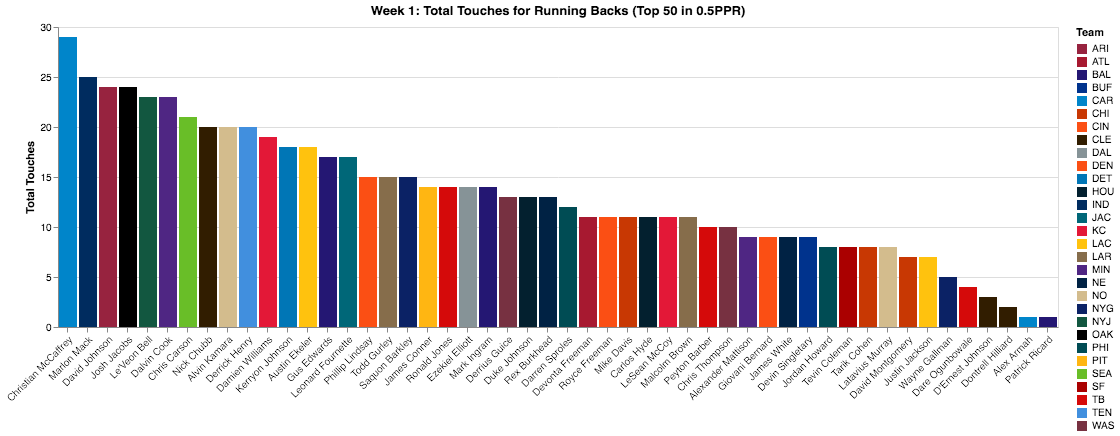

In [47]:
chart

In [48]:
chart.save(PATH + 'plots/RB_totaltouches_color.png', scale_factor=3.0)

In [53]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Touches:Q',
        axis = alt.Axis(title = 'Total Touches')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'Touches',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Receptions:Q'
    )
).properties(title = 'Week 1: Total Touches for Running Backs (Top 50 in 0.5PPR)')

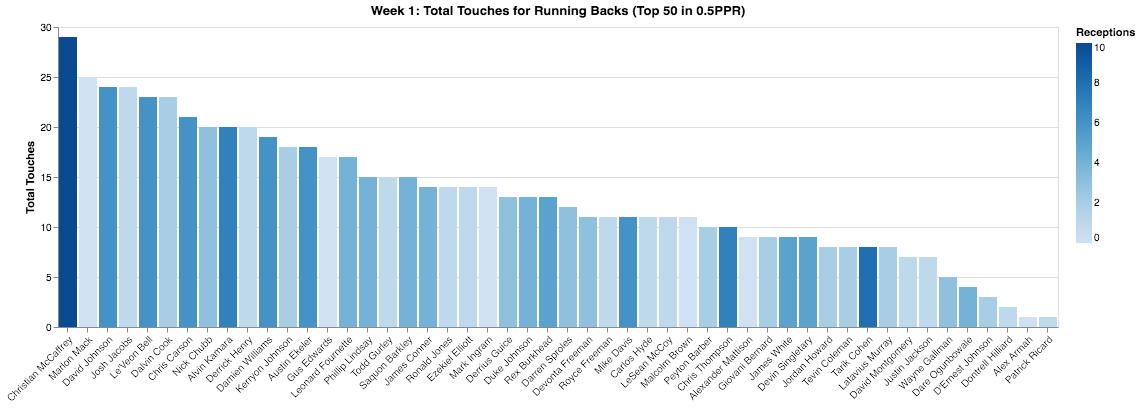

In [54]:
chart

In [55]:
chart.save(PATH + 'plots/RB_totaltouches_plain.png', scale_factor=3.0)

## Yards Per Touch

In [57]:
data = df[['Player', 'Team', 'Attempts', 'RushingYards', 'Receptions', 'ReceivingYards', 'FantasyPoints']].copy()
data['Touches'] = data['Attempts'] + data['Receptions']
data['TotalYards'] = data['RushingYards'] + data['ReceivingYards']
data['YardsPerTouch'] = data['TotalYards']/data['Touches']

In [58]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'YardsPerTouch:Q',
        axis = alt.Axis(title = 'Yards per Touch')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'YardsPerTouch',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Yards per Touch for Running Backs (Top 50 in 0.5PPR)')

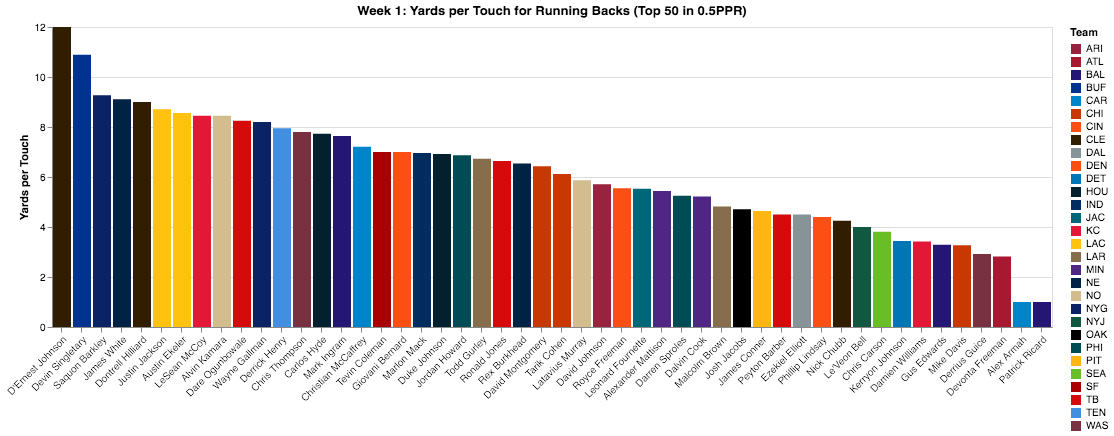

In [59]:
chart

In [ ]:
chart.save(PATH + 'plots/RB_yardspertouch_color.png', scale_factor=3.0)